In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.9.0


In [2]:
#IMDB -> Internet Movies DB
imdb = keras.datasets.imdb

In [3]:
#(train_images , train_labels), (test_images , test_labels) = imdb.load_data()

# -> Two Objects -> Training Object, Test Object
# Training Object -> data [numerical], label[numerical]
# Test Object -> Data[number], label[number]
# (traindata, train label), (test data, test label) = load_data
# a,b = 1,2

(train_data , train_labels), (test_data , test_labels) = imdb.load_data(num_words=10000)
# IMDB data sets will be parsed, and keeps the top 10,000 most frequently occuring words in the training data -> creating a little bias (help us train our data better)

# num_words=10000 -->" gives 10000 most frequently used distinct words" --> will help us train our data better

In [4]:
train_data.shape

(25000,)

In [5]:
print("Training entries are {} and labels are {}".format(len(train_data),len(train_labels)))
# Hello Mr. Orange. How is Mrs. Orange doing? 
# Hello -> 0 Mr.-> 1 Orange. -> 2 How -> 3 is->4 Mrs.->5 Orange->6 doing?->7 your->8 pet?->9
# [ 0 1 2 3 4 5 6 7] 
# How is your pet?
# [ 3 4 8 9] 


Training entries are 25000 and labels are 25000


In [6]:
print(len(train_data[1]))
print(train_labels[1])

189
0


In [7]:
# To see the words
word_index = imdb.get_word_index()
word_index = {k: (v+3) for k,v in word_index.items()}

In [8]:
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 # Unknown
word_index["<UNUSED>"] = 3
# They have been added to the end of the list
# We need them at the starting of the list
# Will reverse them now.
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [9]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

In [10]:
print(decode_review(train_data[12]))

<START> i love cheesy horror flicks i don't care if the acting is sub par or whether the monsters look corny i liked this movie except for the <UNK> feeling all the way from the beginning of the film to the very end look i don't need a 10 page <UNK> or a sign with big letters explaining a plot to me but dark floors takes the what is this movie about thing to a whole new annoying level what is this movie about br br this isn't exceptionally scary or thrilling but if you have an hour and a half to kill and or you want to end up feeling frustrated and confused rent this winner


In [11]:
# We should create the data with same tensores by padding
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"],padding='post',maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"],padding='post',maxlen=256)
# maxlen=256 --> has to be equal to that of the longest sentence

In [12]:
len(test_data[0])

256

In [13]:
train_labels[3]

1

In [14]:
vocab_size=10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation=tf.nn.relu))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))

# The first layer is an Embedding layer. This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. 
# Next, a GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
# If a model has more hidden units (a higher-dimensional representation space), and/or more layers, then the network can learn more complex representations. However, it makes the network more computationally expensive and may lead to learning unwanted patterns—patterns that improve performance on training data but not on the test data. This is called overfitting, and we'll explore it later.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [15]:
# binary_crossentropy --> because the output is binary
model.compile(optimizer=tf.train.AdamOptimizer(), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
%%time
# TEST Data should be used ONLY ONCE because the neural network may learn that and give us correct results.
X_val = train_data[:10000]
partial_X_train = train_data[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

Wall time: 0 ns


In [17]:
# epochs = 80 is really bad results in overfitting
history = model.fit(partial_X_train,partial_y_train,epochs=80,batch_size=512,validation_data=(X_val,y_val),verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/80
15000/15000 [==============================] - 2s 104us/step - loss: 0.6948 - acc: 0.5143 - val_loss: 0.6914 - val_acc: 0.5227
Epoch 2/80
15000/15000 [==============================] - 1s 80us/step - loss: 0.6904 - acc: 0.5746 - val_loss: 0.6892 - val_acc: 0.6410
Epoch 3/80
15000/15000 [==============================] - 1s 87us/step - loss: 0.6875 - acc: 0.6339 - val_loss: 0.6866 - val_acc: 0.6058
Epoch 4/80
15000/15000 [==============================] - 1s 91us/step - loss: 0.6840 - acc: 0.6874 - val_loss: 0.6832 - val_acc: 0.6198
Epoch 5/80
15000/15000 [==============================] - 1s 85us/step - loss: 0.6794 - acc: 0.6921 - val_loss: 0.6780 - val_acc: 0.7548
Epoch 6/80
15000/15000 [==============================] - 1s 79us/step - loss: 0.6734 - acc: 0.7623 - val_loss: 0.6716 - val_acc: 0.7543
Epoch 7/80
15000/15000 [==============================] - 1s 78us/step - loss: 0.6651 - acc: 0.7623 - val_loss: 0.6633 - val_ac

15000/15000 [==============================] - 1s 90us/step - loss: 0.1285 - acc: 0.9617 - val_loss: 0.2921 - val_acc: 0.8865
Epoch 61/80
15000/15000 [==============================] - 1s 94us/step - loss: 0.1260 - acc: 0.9627 - val_loss: 0.2933 - val_acc: 0.8847
Epoch 62/80
15000/15000 [==============================] - 1s 95us/step - loss: 0.1236 - acc: 0.9643 - val_loss: 0.2942 - val_acc: 0.8853
Epoch 63/80
15000/15000 [==============================] - 2s 100us/step - loss: 0.1206 - acc: 0.9650 - val_loss: 0.2947 - val_acc: 0.8864
Epoch 64/80
15000/15000 [==============================] - 1s 92us/step - loss: 0.1182 - acc: 0.9658 - val_loss: 0.2959 - val_acc: 0.8852
Epoch 65/80
15000/15000 [==============================] - 1s 91us/step - loss: 0.1161 - acc: 0.9667 - val_loss: 0.2971 - val_acc: 0.8853
Epoch 66/80
15000/15000 [==============================] - 1s 86us/step - loss: 0.1138 - acc: 0.9679 - val_loss: 0.2982 - val_acc: 0.8858
Epoch 67/80
15000/15000 [====================

In [18]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 28us/step
[0.340583915681839, 0.871]


In [19]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [21]:
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
loss = history.history['loss']
acc = history.history['acc']

epochs = range(1 , len(acc)+1)


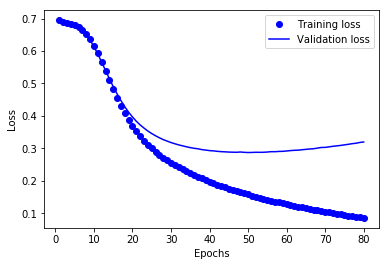

In [28]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

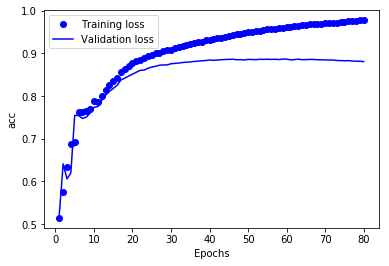

In [29]:
import matplotlib.pyplot as plt1
plt1.plot(epochs, acc, 'bo', label='Training loss')
plt1.plot(epochs, val_acc, 'b', label='Validation loss')
plt1.xlabel('Epochs')
plt1.ylabel('acc')
plt1.legend()
plt1.show()

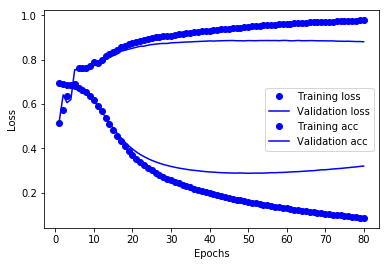

In [30]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 1s 26us/step


In [32]:
test_loss

0.340583915681839

In [33]:
test_acc

0.871

In [34]:
predictions = model.predict(test_data)